In [13]:
cd 'Data Sets'

[Errno 2] No such file or directory: 'Data Sets'
/home/Isaac/Documents/Classes/CPSC4180/Final Project CPSC4180/Data Sets


In [14]:
import pandas as pd

people_killed = pd.read_csv("police_killings_MPV.csv")
people_killed

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,Unknown,Male,Unknown race,NaN,6/9/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8448,28737.0
1,Name withheld by police,Unknown,Male,Unknown race,NaN,5/9/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8446,28734.0
2,Name withheld by police,61,Male,Unknown race,NaN,5/9/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,...,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,off-duty,NaN,8447,28735.0
3,Name withheld by police,22,Male,Unknown race,NaN,5/9/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,...,Vehicle,vehicle,attack,Car,NaN,NaN,NaN,NaN,8449,28736.0
4,Steven D. Smith,33,Male,Unknown race,NaN,4/9/2020,200 N. State Street,Syracuse,NY,13203.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,8444,28726.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,1/1/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,4,12176.0
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,1/1/2013,720 Terrace Way,Bakersfield,CA,93304.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,3,12174.0
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,1/1/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,2,12173.0
8425,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,1/1/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,NaN,Urban,1,12175.0


In [17]:
def return_avg_ages(sOrc,police_data,location_user):
    if sOrc == "State":
        location = police_data[police_data["State"] == location_user]
        location_ages = location["Victim's age"] 
        corrected_ages = []
        for age in location_ages:
            if 's' in age:
                replaced = age.replace('s','')

                corrected_ages.append(int(replaced))
            elif age == "Unknown":
                    continue
            else:
                corrected_ages.append(int(age)) 
                
        return (str(sum(corrected_ages) / len(corrected_ages)))
    elif sOrc == "City":
        location = police_data[police_data["City"] == location_user]
        location_ages = location["Victim's age"] 
        corrected_ages = []
        for age in location_ages:
            if 's' in age:
                replaced = age.replace('s','')

                corrected_ages.append(int(replaced))
            elif age == "Unknown":
                    continue
            else:
                corrected_ages.append(int(age)) 
                
        return (str(sum(corrected_ages) / len(corrected_ages))) 
    else:
        print("You have entered an invalid location type!")
        
def filter_by_gender(police_data,gender,location,sOrc):
    if sOrc == "State":
        gender = police_data[police_data["Victim's gender"] == gender]
        state_gender = gender[gender["State"] == location]
        return state_gender
    elif sOrc == "City":
        gender = police_data[police_data["Victim's gender"] == gender]
        city_gender = gender[gender["City"] == location]
        return city_gender
        
def filter_by_weapon_status_location(police_data,status,location,sOrc):
    if sOrc == "State":
        weapon_status = police_data[police_data["Unarmed/Did Not Have an Actual Weapon"] == status]
        state_weapon = weapon_status[weapon_status["State"] == location]
        return state_weapon
        
    elif sOrc == "City":
        weapon_status = police_data[police_data["Unarmed/Did Not Have an Actual Weapon"] == status]
        state_weapon = weapon_status[weapon_status["City"] == location]
        return state_weapon
    
def filter_by_race(police_data,race,location,sOrc):
    if sOrc == "State":    
        race = police_data[police_data["Victim's race"] == race]
        state_race = race[race["State"] == location]
        return state_race
    elif sOrc == "City":
        race = police_data[police_data["Victim's race"] == race]
        city_race = race[race["City"] == location]
        return city_race
    
def filter_by_weapon_status(police_data,status):
    filtered_status = police_data[police_data["Unarmed/Did Not Have an Actual Weapon"] == status]
    return filtered_status

def filter_by_gender_police(police_data,gender):
    gender = police_data[police_data["Victim's gender"] == gender]
    return gender

def filter_by_race_police(police_data,race):
    race = police_data[police_data["Victim's race"] == race]
    return race

In [18]:
import matplotlib.pyplot as plt


def create_pie_chart_gender(police_data,location,sOrc):
    males = filter_by_gender(police_data,"Male",location,sOrc)
    females = filter_by_gender(police_data,"Female",location,sOrc)
    
    number_gender_occurences = []
    number_gender_occurences.append(len(males))
    number_gender_occurences.append(len(females))
    
    gender_lables = ["Males","Females"]
    
    plt.pie(number_gender_occurences,labels= gender_lables,autopct='%.2f')
    plt.title("Gender Ratio for " + location)
    plt.axis('equal')
    plt.show()
    
def create_pie_chart_whole_set_race(police_data):
    white = filter_by_race_police(police_data,"White")
    black = filter_by_race_police(police_data,"Black")
    hispanic = filter_by_race_police(police_data,"Hispanic")
    unknown = filter_by_race_police(police_data,"Unknown race")
    
    number_race_occurences = []
    number_race_occurences.append(len(white))
    number_race_occurences.append(len(black))
    number_race_occurences.append(len(hispanic))
    number_race_occurences.append(len(unknown))
    
    race_labels = ["White","Black","Hispanic","Unknown"]
    
    plt.pie(number_race_occurences,labels= race_labels,autopct='%.2f')
    plt.title("Race Ratio for All Police Data")
    plt.axis('equal')
    plt.show()
    
    
def create_pie_chart_whole_set_gender(police_data):
    male = filter_by_gender_police(police_data,"Male")
    female = filter_by_gender_police(police_data,"Female")
    number_gender_occurences = []
    number_gender_occurences.append(len(male))
    number_gender_occurences.append(len(female))
    gender_labels = ["Males","Females"]
    plt.pie(number_gender_occurences,labels=gender_labels,autopct='%.2f')
    plt.title("Gender Ratio for All Police Data")
    plt.axis('equal')
    plt.show()
    
    
def create_pie_chart_race(police_data,location,sOrc):
    white = filter_by_race(police_data,"White",location,sOrc)
    black = filter_by_race(police_data,"Black",location,sOrc)
    hispanic = filter_by_race(police_data,"Hispanic",location,sOrc)
    unknown = filter_by_race(police_data,"Unknown race",location,sOrc)
    
    number_race_occurences = []
    number_race_occurences.append(len(white))
    number_race_occurences.append(len(black))
    number_race_occurences.append(len(hispanic))
    number_race_occurences.append(len(unknown))
    
    race_labels = ["White","Black","Hispanic","Unknown"]
    
    plt.pie(number_race_occurences,labels= race_labels,autopct='%.2f')
    plt.title("Race Ratio for " + location)
    plt.axis('equal')
    plt.show()
    
    
def create_pie_chart_whole_set_weapon_status(police_data):
    unarmed = filter_by_weapon_status(police_data,"Unarmed/Did Not Have an Actual Weapon")
    armed = filter_by_weapon_status(police_data,"Allegedly Armed")
    vehicle = filter_by_weapon_status(police_data,"Vehicle")
    
    
    number_status_occurences = []
    number_status_occurences.append(len(unarmed))
    number_status_occurences.append(len(armed))
    number_status_occurences.append(len(vehicle))
    
    labels_status = ["Unarmed","Armed","Vehicle"]
    plt.pie(number_status_occurences,labels=labels_status,autopct='%.2f')
    plt.title("Weapon Status for All Police Data")
    plt.axis('equal')
    plt.show()
    
    
def create_pie_chart_location_weapon_status(police_data,location,sOrc):
    unarmed = filter_by_weapon_status_location(police_data,"Unarmed/Did Not Have an Actual Weapon",location,sOrc)
    armed = filter_by_weapon_status_location(police_data,"Allegedly Armed",location,sOrc)
    vehicle = filter_by_weapon_status_location(police_data,"Vehicle",location,sOrc)
    number_status_occurences = []
    number_status_occurences.append(len(unarmed))
    number_status_occurences.append(len(armed))
    number_status_occurences.append(len(vehicle))
    
    labels_status = ["Unarmed","Armed","Vehicle"]
    plt.pie(number_status_occurences,labels=labels_status,autopct='%.2f')
    plt.title("Weapon Status for " + str(location))
    plt.axis('equal')
    plt.show()

This cell below prompts the user for either "State" or "City" and the location to create pie-charts based on race, gender, and location. These functions here are seperate from the functions used in the next calculations. The functions used here are to specifically sub-set based on a location, rather than the overview of the entire set. 

Enter if you want a state or a city to see ratios of Race, Gender, or Weapon Status. State
Enter a location: NM


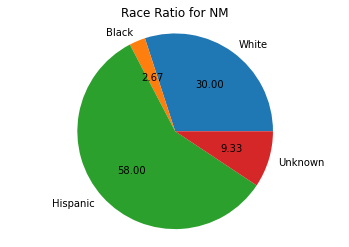

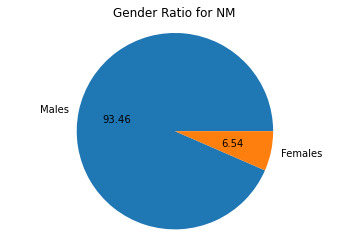

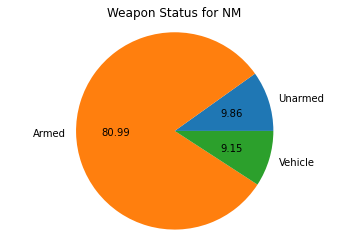

In [22]:
people_killed = pd.read_csv("police_killings_MPV.csv")

user_choice = input("Enter if you want a state or a city to see ratios of Race, Gender, or Weapon Status. ")
user_location_choice = input("Enter a location: ")
create_pie_chart_race(people_killed,user_location_choice,user_choice)
create_pie_chart_gender(people_killed,user_location_choice,user_choice)
create_pie_chart_location_weapon_status(people_killed,user_location_choice,user_choice)

This cell below uses the previously created functions to create a pie chart to display the total occurences in the police_killings_MPV file based on gender, race, and the weapon status. Simply passing in the read csv file will be used by the functions to display this. 

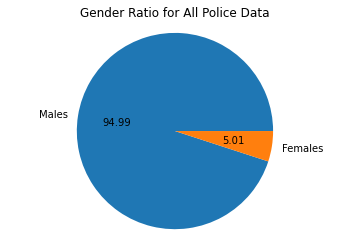

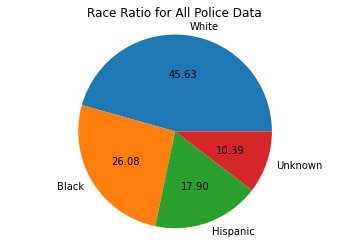

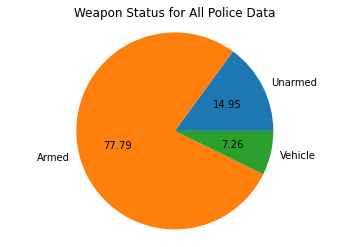

In [30]:
people_killed = pd.read_csv("police_killings_MPV.csv")

create_pie_chart_whole_set_gender(people_killed)
create_pie_chart_whole_set_race(people_killed)
create_pie_chart_whole_set_weapon_status(people_killed)

In [23]:
import numpy as np
import matplotlib.pyplot as plt



        
def create_double_bar_chart_gender(police_data):
    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')
            
            
    number_groups = 5
    
    number_males_in_state = []
    number_female_in_state = []
    
    user_selected_states = []
    fig, ax = plt.subplots()
    index = np.arange(number_groups)
    bar_width = 0.25
   
    
    for i in range(5):
        state = input("Enter a state: ")
        user_selected_states.append(state)
        males = filter_by_gender(police_data,"Male",state,"State")
        number_males_in_state.append(len(males))
        females = filter_by_gender(police_data,"Female",state,"State")
        number_female_in_state.append(len(females))
        
    rectangle_male = plt.bar(index,number_males_in_state,bar_width,label='Males')
    rectangle_female = plt.bar(index + bar_width,number_female_in_state,bar_width,label='Female')
    
    
    
    plt.xlabel("States")
    plt.ylabel("Number of occurences")
    plt.title("Gender occurences in five selected States")
    plt.xticks(index + bar_width,user_selected_states)
    plt.legend()
    plt.tight_layout()
    
    autolabel(rectangle_male)
    autolabel(rectangle_female)
    plt.show()

def create_double_bar_chart_race(police_data,selected_states):
    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')
            
            
    number_groups = 3
    
    number_white_in_state = []
    number_black_in_state = []
    number_hispanic_in_state = []
    number_unknown_in_state = []
    
   
    
    fig, ax = plt.subplots()
    index = np.arange(number_groups)
    bar_width = 0.25
   
    
    for state in selected_states:
           
        white = filter_by_race(police_data,"White",state,"State")
        number_white_in_state.append(len(white))
        
        
        black = filter_by_race(police_data,"Black",state,"State")
        number_black_in_state.append(len(black))
        
        hispanic = filter_by_race(police_data,"Hispanic",state,"State")
        number_hispanic_in_state.append(len(hispanic))
        
        unknown = filter_by_race(police_data,"Unknown race",state,"State")
        number_unknown_in_state.append(len(unknown))
        
    rectangle_white = plt.bar(index,number_white_in_state,bar_width,label='White',align='edge')
    rectangle_black = plt.bar(index + bar_width,number_black_in_state,bar_width,label='Black',align='edge')
    rectangle_hispanic = plt.bar(index + bar_width + bar_width,number_hispanic_in_state,bar_width,label='Hispanic',align='edge')
    rectangle_unknown = plt.bar(index + bar_width + bar_width + bar_width,number_unknown_in_state,bar_width,label='Unknown',align='edge')
    
    
    plt.xlabel("States")
    plt.ylabel("Number of occurences")
    plt.title("Race occurences in three selected States")
    plt.xticks(index + bar_width,selected_states)
    plt.legend()
    #plt.tight_layout()
    
    autolabel(rectangle_white)
    autolabel(rectangle_black)
    autolabel(rectangle_hispanic)
    autolabel(rectangle_unknown)
    plt.show()

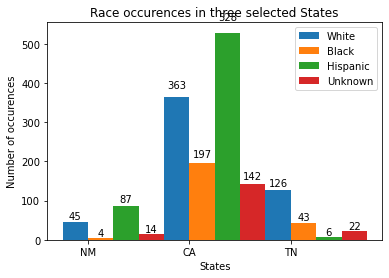

In [24]:
people_killed = pd.read_csv("police_killings_MPV.csv")
'''
Enter a state: TN
Enter a state: CA
Enter a state: GA
Enter a state: WA
Enter a state: OK
'''
#create_double_bar_chart_gender(people_killed)
create_double_bar_chart_race(people_killed,("NM","CA","TN"))

In [25]:
import pandas as pd

chattanooga_arrests = pd.read_csv("CPD_Arrest_Charges.csv")
chattanooga_arrests

,Arrest Date,Case Number,TCA Code,Statute Description,UCR Code,UCR Description,Charges,Address Number,Street Name,City,Zip,Latitude,Longitude,geom,Race,Sex,Council District,Hamilton County Census Tracts - 2010
0,01/08/2018 08:32:00 PM,17-094887,39-17-417,Schedule I-VII Drug Violations,35A,Drug/Narcotic Violations,35A DRUG/NARCOTIC VIOLATIONS,100.0,Rocksberry Cir,Chattanooga,37343,NaN,NaN,NaN,Black,Female,NaN,NaN
1,01/04/2018 03:45:00 PM,18-001147,39-14-146,Shoplifting-Theft Of Property,23C,Shoplifting,23C SHOPLIFTING,400.0,GREENWAY DR.,Chattanooga,37411-,NaN,NaN,NaN,Black,Male,NaN,NaN
2,02/18/2018 06:30:00 PM,18-014814,39-14-146,Shoplifting-Theft Of Property,23C,Shoplifting,23C SHOPLIFTING,3500.0,CUMMINGH HWY.,CHATTANOOGA,37403,NaN,NaN,NaN,White,Male,NaN,NaN
3,04/05/2018 02:03:00 AM,18-029713,"39-17-405,406",Schedule I Drug Violations,35A,Drug/Narcotic Violations,Drugs/Narcotics Violation/Felony,900.0,Spring Creek Rd,Chattanooga,37341,NaN,NaN,NaN,White,Male,NaN,NaN
4,04/05/2018 02:03:00 AM,18-029713,39-17-425,Unlawful Drug Paraphernalia,35B,Drug Equipment Violations,Drug Equipment Violation,900.0,Spring Creek Rd,Chattanooga,37341,NaN,NaN,NaN,White,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49513,09/07/2020 11:10:00 AM,20-090473,39-14-405,Criminal Trespass,90J,Trespass Of Real Property,Trespass of Real Property,3500.0,Cummings Hwy,Chattanooga,37419,35.015326,-85.376403,POINT (-85.376403 35.015326),Black,Female,1.0,12100.0
49514,09/07/2020 01:40:00 PM,20-090504,39-14-103,Theft All Other Larceny,23H,All Other Larceny,Other Theft/Non-Specific,1900.0,Gunbarrel Rd,Chattanooga,37421,35.028683,-85.156642,POINT (-85.156642 35.028683),White,Female,4.0,11321.0
49515,09/07/2020 03:08:00 PM,20-090537,39-13-511,Indecent Exposure,90Z,All Other Offenses,Exhibitionist,4700.0,Brainerd Rd,Chattanooga,37411,35.014683,-85.228864,POINT (-85.228864 35.014683),Black,Male,5.0,2900.0
49516,09/07/2020 04:48:00 PM,20-090589,39-17-418,Simple Possession/Casual Exchange,91Z,NaN,Serving Warrant,NaN,Arlington Ave/Camden St,Chattanooga,37406,35.052946,-85.258247,POINT (-85.258247 35.052946),Black,Male,9.0,12200.0


In [26]:
def filter_cpd_data_gender(chattanooga_arrests,gender):
    gender_filtered = chattanooga_arrests[chattanooga_arrests["Sex"] == gender]
    return gender_filtered

def filter_cpd_data_race(chattanooga_arrests,race):
    race_filtered = chattanooga_arrests[chattanooga_arrests["Race"] == race]
    return race_filtered
def filter_cpd_data_statute(chattanooga_arrests,statute):
    statute = chattanooga_arrests[chattanooga_arrests["Statute Description"] == statute]
    return statute

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def create_pie_chart_gender_chattanooga(chattanooga_arrests):
    males = filter_cpd_data_gender(chattanooga_arrests,"Male")
    females = filter_cpd_data_gender(chattanooga_arrests,"Female")
    
    
    male_size = males.index
    female_size = females.index
    
    number_gender_occurences = []
    number_gender_occurences.append(len(male_size))
    number_gender_occurences.append(len(female_size))
    
    gender_lables = ["Males","Females"]
    
    plt.pie(number_gender_occurences,labels= gender_lables,autopct='%.2f')
    plt.title("Gender Ratio for Chattanooga Arrests: ")
    plt.axis('equal')
    plt.show()
    
def create_pie_chart_race_chattanooga(chattanooga_arrests):
    white = filter_cpd_data_race(chattanooga_arrests,"White")
    black = filter_cpd_data_race(chattanooga_arrests,"Black")
    #hispanic = filter_cpd_data_race(chattanooga_arrests,"Hispanic")
    unknown = filter_cpd_data_race(chattanooga_arrests,"Other")
    
    number_race_occurences = []
    number_race_occurences.append(len(white))
    number_race_occurences.append(len(black))
   # number_race_occurences.append(len(hispanic))
    number_race_occurences.append(len(unknown))
    
    race_labels = ["White","Black","Other"]
    
    plt.pie(number_race_occurences,labels= race_labels,autopct='%.2f')
    plt.title("Race Ratio for Chattanooga")
    plt.axis('equal')
    plt.show()
    
def create_pie_chart_statute_chattanooga(chattanooga_arrests,statute):
    statutes = filter_cpd_data_statute(chattanooga_arrests,statute)
    number_race_occurences = []
    number_race_occurences.append(len(statute))
    number_race_occurences.append(len(chattanooga_arrests))
    
    labels = [statute,"All Arrests"]
    
    plt.pie(number_race_occurences,labels= labels,autopct='%.2f')
    plt.title("Statute Ratio for Chattanooga")
    plt.axis('equal')
    plt.show()

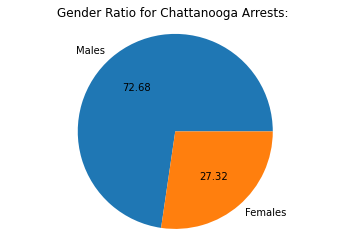

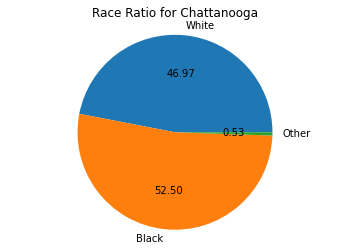

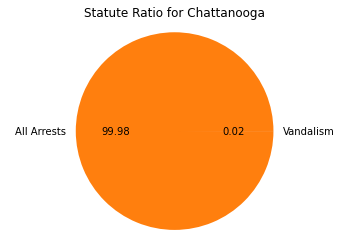

In [28]:
chattanooga_arrests = pd.read_csv("CPD_Arrest_Charges.csv")
#print(chattanooga_arrests)
create_pie_chart_gender_chattanooga(chattanooga_arrests)
create_pie_chart_race_chattanooga(chattanooga_arrests)
create_pie_chart_statute_chattanooga(chattanooga_arrests,"Vandalism")